In [75]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import linear_model

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


Use `sklearn.datasets.make_mooons` to generate two classes, blue dots = males and red dots = females or any other binary classification (x and y are medical measures). The data is non-linearly separable, it means you can't draw a straigh line to separate between two classes and so linear classifiers won't work.
Example from [Denny Britz](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/)
**Goal** predict  correct class given x, y coordinates.

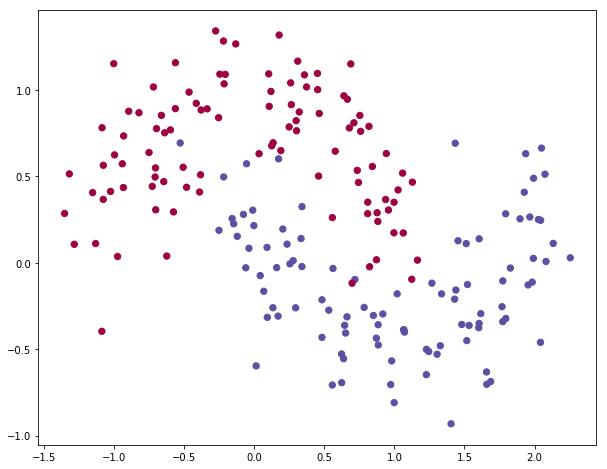

In [76]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [77]:

# Train the logistic rgeression classifier
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

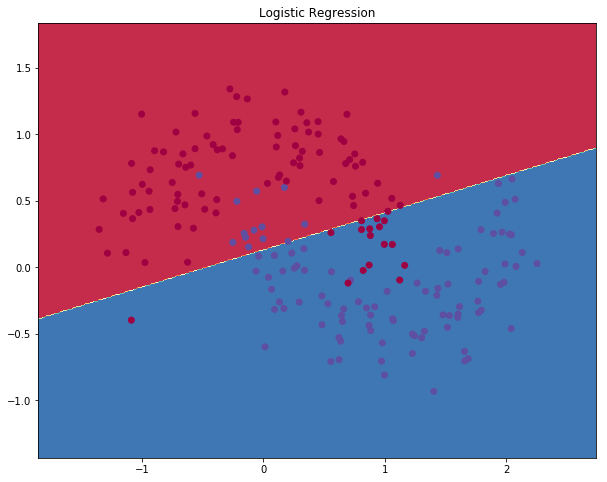

In [68]:
# Plot the decision boundary
plot_decision_boundary (lambda x: clf.predict(x))
plt.title("Logistic Regression")

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# TODO

In [69]:
num_examples = len(X) # training set size
input_dim = 2 # input layer dimensionality
output_dim = 2 # output layer dimensionality
# Gardien descent parameters
eps = 0.01 # learning rate for GD
reg_lambda = 0.01 # regularization strength

In [70]:
# function to evaluate the total loss on the dataset
def calc_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [71]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    print(b1)
    # fp to calculate our predictions
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1) # TODO make comment
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


In [72]:
def build_model(h_dim, num_passes=10, print_loss=False):
    # Initialize params to rando values, NN needs to learn these
    np.random.seed(0)
    W1 = np.random.randn(input_dim, h_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, h_dim))
    W2 = np.random.randn(h_dim, output_dim) / np.sqrt(h_dim)
    b2 = np.zeros((1, output_dim))
    
    # return this at the end
    model = {}
    
    # GD for each batch
    for i in range(0, num_passes):
        # FP
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # BP
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # GD parameter update
        W1 += -eps * dW1
        b1 += -eps * db1
        W2 += -eps * dW2
        b2 += -eps * db2
        # assign new parameters to model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # optionally print loss
        if print_loss and i % 10000 == 0:
            print("Loss after iteration %i: %f" % (i, calc_loss(model)))
        
    return model



In [ ]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)


Loss after iteration 0: 0.432387
[[-0.40672653 -0.0675418   0.04295416]]


Text(0.5,1,'Decision Boundary for hidden layer size 3')

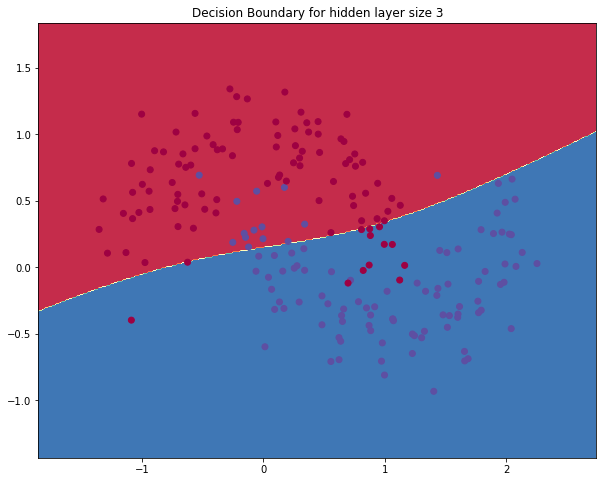

In [74]:

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")